In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('files/player_analysis_files/player_stats.csv')

In [49]:
data = data.drop(['Unnamed: 0'], axis = 1)

For data cleaning, we want to see if there are any null types to allow our data to be easier read and identified in the machine learning algorithim/

In [50]:
pd.isnull(data).sum()

Player           0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%             59
3P               0
3PA              0
3P%           2086
2P               0
2PA              0
2P%            100
eFG%            59
FT               0
FTA              0
FT%            521
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Year             0
Pts Won          0
Pts Max          0
Share            0
Team             0
Wins             0
Losses           0
W/L%             0
Game Score       0
dtype: int64

It seems like there are missing valuesd in FG%, 3P%, eFG%, FT%, etc. One reason they might be null is because they just didn't take any shots. If a player didn't take any shots, their % wouldn't be 0, it wouldn't exist

In [51]:
data[pd.isnull(data['3P%'])].get(['Player', '3P', '3PA', '3P%'])

,Player,3P,3PA,3P%
2,Elden Campbell,0.0,0.0,NaN
3,Irving Thomas,0.0,0.0,NaN
18,Jack Haley,0.0,0.0,NaN
20,Keith Owens,0.0,0.0,NaN
30,Benoit Benjamin,0.0,0.0,NaN
...,...,...,...,...
14666,Evan Eschmeyer,0.0,0.0,NaN
14667,Gheorghe Mureșan,0.0,0.0,NaN
14669,Jim McIlvaine,0.0,0.0,NaN
14675,Mark Hendrickson,0.0,0.0,NaN


In [52]:
data[pd.isnull(data['FG%'])].get(['Player', 'FGA']).head(10)

,Player,FGA
103,Adrian Caldwell,0.0
250,Guy Rucker,0.0
428,Gani Lawal,0.0
1172,C.J. Miles,0.0
1850,Ade Murkey,0.0
2112,Ronny Turiaf,0.0
2358,DeJon Jarreau,0.0
2411,Lari Ketner,0.0
2932,Ben Moore,0.0
2947,Trey McKinney-Jones,0.0



Just by looking at those who had a null value in either their FG% or their 3P%, since it looks like they didn't attempt a single 3 pointer or FG, we can safely replace their null values with a 0%. Judging by correlation, these don't seem to affect the win shares that much as well as it is safe to assume that an MVP would need to score in order to be deemed the most valuable player

In [53]:
data = data.fillna(0)

In [54]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'Wins', 'Losses', 'W/L%',
       'Game Score'],
      dtype='object')

One of the best ways to separate predictors is to divide them into categories based on either numerical or categorical, because they help illustrate differently in the models, because otherwise, combining both numerical and categorical categories can damage how each is interpreted. In this case, since we are predicted a numerical value that is almost only determined by numbers, we don't need categorical variables like 'Player', 'Pos', 'Tm', 'Team', as well as the 'Pts Won', 'Pts Max', or 'Share', because otherwise, the model will know the thing that we want to predict.

/var/folders/lz/89b0m93557x4pjgtj7v1dcpc0000gn/T/ipykernel_80112/1091597416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Share'].plot.bar('')


<AxesSubplot: >

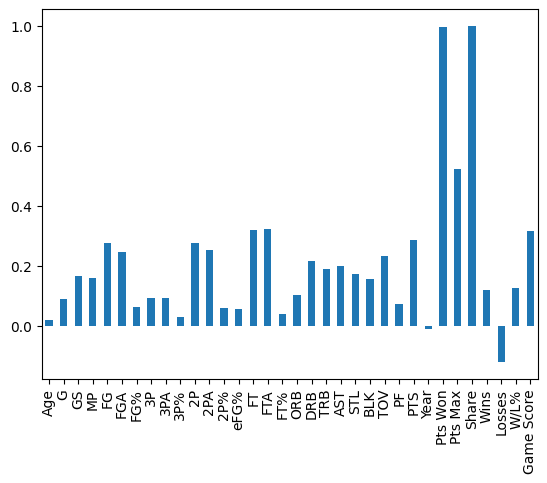

In [55]:
data.corr()['Share'].plot.bar('')

In [56]:
numerical_categories = np.array(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Wins', 'Losses', 'W/L%', 'Game Score'])

In [57]:
train = data[data['Year'] < 2022]

In [58]:
test = data[data['Year'] == 2022]

In [59]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = 0.1)

In [60]:
reg.fit(train[numerical_categories], train['Share'])

Ridge(alpha=0.1)

In [61]:
predictions = reg.predict(test[numerical_categories])

In [62]:
predictions = pd.DataFrame(predictions, columns = ['predictions'], index = test.index)

In [63]:
predictions

,predictions
648,0.017807
649,-0.021191
650,0.000130
651,0.020257
652,0.001872
...,...
12508,-0.019183
12509,-0.009122
12510,0.005674
12511,0.002639


In [64]:
combination = pd.concat([test[['Player', 'Share']], predictions], axis = 1)

In [65]:
combination

,Player,Share,predictions
648,Aaron Gordon,0.0,0.017807
649,Austin Rivers,0.0,-0.021191
650,Bol Bol,0.0,0.000130
651,Bones Hyland,0.0,0.020257
652,Bryn Forbes,0.0,0.001872
...,...,...,...
12508,Micah Potter,0.0,-0.019183
12509,Rodney McGruder,0.0,-0.009122
12510,Saben Lee,0.0,0.005674
12511,Saddiq Bey,0.0,0.002639


In [66]:
combination.sort_values('Share', ascending = False)

,Player,Share,predictions
663,Nikola Jokić,0.875,0.184047
837,Joel Embiid,0.706,0.189736
11678,Giannis Antetokounmpo,0.595,0.218691
907,Devin Booker,0.216,0.088969
11469,Luka Dončić,0.146,0.151718
...,...,...,...
3947,Nikola Vučević,0.000,0.053610
3948,Patrick Williams,0.000,-0.012369
3949,Tony Bradley,0.000,-0.005762
3950,Tristan Thompson,0.000,-0.003734


In [67]:
combination.sort_values('predictions', ascending = False)

,Player,Share,predictions
11678,Giannis Antetokounmpo,0.595,0.218691
837,Joel Embiid,0.706,0.189736
663,Nikola Jokić,0.875,0.184047
8241,LeBron James,0.001,0.152167
11469,Luka Dončić,0.146,0.151718
...,...,...,...
1210,Scotty Hopson,0.000,-0.051213
11821,Wes Iwundu,0.000,-0.055127
12495,Derrick Walton,0.000,-0.058739
1216,Zavier Simpson,0.000,-0.061198


It looks like the machine learning model isn't the greatest. It predicted Giannis Antetokounmpo would be the MVP last year, when it was in fact Nikola Jokic, Joel Embiid, then Giannis. Let's try to find some error metrics that might have influenced the reason why this model wasn't the greatest

In [68]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination['Share'], combination['predictions'])

0.00224086107924341

It seems like there is a very small mean_squared_error for this model, however this doesn't really matter. Since most players are intuitively going to have an MVP share of 0, of course there's going to be a small mean_squared_error. Instead, look for something more meaningful

In [69]:
combination = combination.sort_values('Share', ascending = False)
combination['Rank'] = list(range(1, combination.shape[0]+1))

In [70]:
combination = combination.sort_values('predictions', ascending = False)
combination['Predicted Rank'] = list(range(1, combination.shape[0] + 1))

In [71]:
combination.head(10)

,Player,Share,predictions,Rank,Predicted Rank
11678,Giannis Antetokounmpo,0.595,0.218691,3,1
837,Joel Embiid,0.706,0.189736,2,2
663,Nikola Jokić,0.875,0.184047,1,3
8241,LeBron James,0.001,0.152167,10,4
11469,Luka Dončić,0.146,0.151718,5,5
6185,Kevin Durant,0.001,0.141632,12,6
12226,Ja Morant,0.010,0.121689,7,7
11820,Trae Young,0.000,0.110903,289,8
8231,Anthony Davis,0.000,0.105708,112,9
836,James Harden,0.000,0.105159,393,10


In [72]:
combination

,Player,Share,predictions,Rank,Predicted Rank
11678,Giannis Antetokounmpo,0.595,0.218691,3,1
837,Joel Embiid,0.706,0.189736,2,2
663,Nikola Jokić,0.875,0.184047,1,3
8241,LeBron James,0.001,0.152167,10,4
11469,Luka Dončić,0.146,0.151718,5,5
...,...,...,...,...,...
1210,Scotty Hopson,0.000,-0.051213,312,601
11821,Wes Iwundu,0.000,-0.055127,288,602
12495,Derrick Walton,0.000,-0.058739,215,603
1216,Zavier Simpson,0.000,-0.061198,318,604


One metric that we can use, in this case, since we are using ranking, is one that depends on rank and how long each player(let's say top 5) that it took to predict until we actually got a good margin and score. It compares the the players that were in the top 5, and how long it took for the other players to be in the top 5 compared to the predicted ones

In [73]:
def find_ap(dataframe):
    # finds the actual top 5 vote getters in the MVP race
    actual = dataframe.sort_values('Share', ascending = False).head(5)
    predicted = dataframe.sort_values('predictions', ascending = False)
    found, seen = 0, 1
    actual_top_5 = []
    for player in predicted.Player:
        if player in actual.Player.values:
            found += 1
            actual_top_5.append(found/seen)
        seen += 1
    return sum(actual_top_5)/len(actual_top_5)

In [74]:
find_ap(combination)

0.8188235294117646

In [75]:
years = range(1991, 2023)

In [79]:
aps = []
all_predictions = []
for year in years[5:]:
    train = data[data['Year'] < year]
    test = data[data['Year'] == year]
    reg.fit(train[numerical_categories], train['Share'])
    predictions = reg.predict(test[numerical_categories])
    predictions = pd.DataFrame(predictions, columns = ['predictions'], index = test.index)
    combination = pd.concat([test[['Player', 'Share']], predictions], axis = 1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [82]:
aps

[0.47000000000000003,
 0.4022916666666667,
 0.7976190476190476,
 0.3897744360902255,
 0.8392857142857142,
 0.9028571428571428,
 0.7022012578616352,
 0.9666666666666666,
 0.5021018062397372,
 0.5316161616161617,
 0.39296167247386754,
 0.6619047619047619,
 0.8766666666666666,
 0.925,
 0.8142857142857143,
 0.7142857142857142,
 0.44642857142857134,
 0.696923076923077,
 0.6288819875776397,
 0.9266666666666665,
 0.8242424242424242,
 0.8111111111111111,
 0.8,
 0.6375757575757576,
 0.9428571428571428,
 0.6803030303030303,
 0.8188235294117646]

In [83]:
sum(aps)/len(aps)

0.7075308047265522

In [84]:
def add_ranks(predictions):
    predictions = predictions.sort_values('Share', ascending = False)
    predictions['Rk'] = list(range(1, predictions.shape[0] + 1))
    predictions = predictions.sort_values('predictions', ascending = False)
    predictions['Predicted_Rk'] = list(range(1, predictions.shape[0] + 1))
    predictions['Rk_Difference'] = predictions['Rk'] - predictions['Predicted_Rk']
    return predictions

In [88]:
ranked = add_ranks(all_predictions[1])
ranked[ranked['Rk'] <= 5].sort_values('Rk_Difference', ascending = False)

,Player,Share,predictions,Rk,Predicted_Rk,Rk_Difference
1710,Karl Malone,0.857,0.186804,1,2,-1
10976,Michael Jordan,0.832,0.166714,2,3,-1
970,Grant Hill,0.327,0.123315,3,5,-2
4912,Tim Hardaway,0.207,0.051290,4,24,-20
8642,Glen Rice,0.117,0.026710,5,64,-59


Create a function in order to test a model in a function that is easy to call and diagnose

In [89]:
def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = stats[stats['Year'] < year]
        test = stats[stats['Year'] == year]
        reg.fit(train[predictors], train['Share'])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns = ['predictions'], index = test.index)
        combination = pd.concat([test[['Player', 'Share']], predictions], axis = 1)
        all_predictions.append(combination)
        aps.append(find_ap(combination))

    #  return average prediction, and all of the predictions
    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [90]:
avg_prediction, total_predictions, all_predictions = backtest(data, reg, years[5:], numerical_categories)

In [93]:
all_predictions

,Player,Share,predictions
70,A.C. Green,0.000,-0.007340
71,Charles Barkley,0.007,0.128760
72,Chris Carr,0.000,0.005534
73,Danny Manning,0.000,0.040916
74,Elliot Perry,0.000,0.015466
...,...,...,...
12508,Micah Potter,0.000,-0.019183
12509,Rodney McGruder,0.000,-0.009122
12510,Saben Lee,0.000,0.005674
12511,Saddiq Bey,0.000,0.002639


Check which values are most influential to how well players do in their seasons

In [97]:
pd.concat([pd.Series(reg.coef_), pd.Series(numerical_categories)], axis = 1).sort_values(0, ascending = False)

,0,1
13,0.074078,eFG%
18,0.032021,DRB
10,0.014533,2P
17,0.014271,ORB
5,0.013423,FGA
30,0.010263,Game Score
29,0.009635,W/L%
15,0.007219,FTA
7,0.004371,3P
22,0.003689,BLK


We can make our model significantly better. One way we can identify how well a player did(in order to make our model stronger is to see how well they did in comparison to their peers). How much more did they score in comparison to their peers, in things like points, assists, steals, blocks, etc

In [139]:
data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Losses,W/L%,Game Score,PTS_Z,AST_Z,STL_Z,BLK_Z,3P_Z,Total Games,% Games Played
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,24,0.707,8.79,1.013334,0.420714,0.961127,0.673469,0.508587,82,1.00
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,24,0.707,10.55,1.614653,1.028412,1.647646,0.673469,4.577279,82,1.00
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,24,0.707,2.54,0.311795,0.093492,0.274608,1.571429,0.000000,82,0.63
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,24,0.707,1.05,0.200440,0.186984,0.274608,0.000000,0.000000,82,0.32
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,24,0.707,16.04,2.383005,1.636110,1.784950,0.897959,1.525760,82,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,40,0.512,5.35,0.735752,0.819562,0.479763,1.528302,0.650951,82,0.66
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,40,0.512,0.17,0.071202,0.000000,0.000000,0.000000,0.130190,82,0.10
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,40,0.512,9.61,1.281633,0.601012,1.119447,2.547170,0.520761,82,0.66
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,40,0.512,3.29,0.474679,0.218550,0.319842,1.273585,0.650951,82,0.70


In [102]:
stat_ratios = data[['PTS', 'AST', 'STL', 'BLK', '3P', 'Year']].groupby('Year').apply(lambda x: x/x.mean())

/var/folders/lz/89b0m93557x4pjgtj7v1dcpc0000gn/T/ipykernel_80112/1280419057.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  stat_ratios = data[['PTS', 'AST', 'STL', 'BLK', '3P', 'Year']].groupby('Year').apply(lambda x: x/x.mean())


In [104]:
data[['PTS_Z', 'AST_Z', 'STL_Z', 'BLK_Z', '3P_Z']] = stat_ratios[['PTS', "AST", 'STL', 'BLK', '3P']]

In [110]:
numerical_categories = np.append(numerical_categories, ['PTS_Z', 'AST_Z', 'STL_Z', 'BLK_Z', '3P_Z'])

In [131]:
avg_prediction, total_predictions, all_predictions = backtest(data, reg, years[5:], numerical_categories)

In [124]:
total_predictions

[0.626993006993007,
 0.35218360071301247,
 0.7912087912087912,
 0.3613095238095238,
 0.8392857142857142,
 0.9028571428571428,
 0.6997267759562841,
 0.9666666666666666,
 0.5076190476190476,
 0.5352046783625731,
 0.3226839826839827,
 0.6302564102564102,
 0.6644444444444444,
 0.925,
 0.7833333333333333,
 0.7253968253968253,
 0.47142857142857136,
 0.7109090909090909,
 0.6492307692307693,
 0.9266666666666665,
 0.8333333333333333,
 0.8253968253968254,
 0.7753968253968253,
 0.6375757575757576,
 0.9666666666666666,
 0.7385714285714285,
 0.8714285714285713]

We can make this model better. One thing that I've seen that it doesn't account for is the amount of games in a season, and the % that a certain player played in them. If a player is putting up MVP-like numbers for half of the season, but is injured for the rest, he isn't an MVP candidate

Another thing we have to account for is that certain seasons had less games. For instance, the 2020 season had shorter seasons for some teams, and longer seasons for other teams since only ~20 teams were in the bubble. Realistically, however, the MVP candidates were not at home because MVP candidates are on teams with decent-good records, so we can ignore those who didn't play in the bubble. The 2021 team was also shorter, with only 72 games, as well as 2011-12(66 games), 1998-99(50 games)

In [115]:
a = np.array([82, 82, 82, 82, 82, 82, 82, 82, 50, 82, 82, 82, 82, 82, 82, 82, 82,
       82, 82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 75, 72, 82])
year_to_games = {year:games for (year, games) in zip(range(1991, 2023), a)}

In [116]:
data['Total Games'] = data['Year'].apply(lambda x: year_to_games[x])

In [117]:
data['% Games Played'] = round(data['G']/data['Total Games'], 2)

In [119]:
new_categories = numerical_categories
new_categories = np.append(new_categories, ['% Games Played'])

In [127]:
new_categories

array(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Wins',
       'Losses', 'W/L%', 'Game Score', 'PTS_Z', 'AST_Z', 'STL_Z', 'BLK_Z',
       '3P_Z', '% Games Played'], dtype='<U14')

In [128]:
avg_prediction, total_predictions, all_predictions = backtest(data, reg, years[5:], new_categories)

In [130]:
avg_prediction

0.7057384801166626

In [129]:
total_predictions

[0.626993006993007,
 0.35218360071301247,
 0.7912087912087912,
 0.37463369963369964,
 0.8392857142857142,
 0.9028571428571428,
 0.6997267759562841,
 0.9666666666666666,
 0.5076190476190476,
 0.5352046783625731,
 0.3226839826839827,
 0.6302564102564102,
 0.6644444444444444,
 0.925,
 0.7833333333333333,
 0.7253968253968253,
 0.47142857142857136,
 0.7109090909090909,
 0.6492307692307693,
 0.9266666666666665,
 0.8333333333333333,
 0.8253968253968254,
 0.7753968253968253,
 0.6375757575757576,
 0.9666666666666666,
 0.7394117647058823,
 0.8714285714285713]

Realistically, it's going to take more to predict the MVP. One way we can do this is to use advanced statistics to predict how well a player is going to play. To do that, we are going to another python notebook

In [133]:
advanced_stats = pd.read_csv('files/player_analysis_files/full_player_stats.csv')

In [135]:
advanced_stats = advanced_stats.drop(['Unnamed: 0'], axis = 1)

In [143]:
advanced_data = data.merge(advanced_stats, how = 'outer')

In [146]:
advanced_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,12.8,15.6,3.2,2.9,6.1,0.135,0.1,-0.2,0.0,1.1
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,7.1,19.9,3.6,2.9,6.6,0.120,0.3,0.6,0.9,2.0
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,10.0,18.4,0.4,0.7,1.1,0.135,-3.0,1.6,-1.4,0.1
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,18.0,29.1,-0.3,0.2,-0.1,-0.057,-8.7,-1.6,-10.3,-0.2
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,7.5,24.6,5.5,3.5,9.0,0.143,2.2,0.3,2.5,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,14.0,19.8,0.7,1.0,1.7,0.102,-0.3,0.8,0.5,0.5
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,14.5,0.0,0.0,0.0,-0.075,-6.3,-4.9,-11.2,-0.1
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,7.8,21.4,0.4,1.9,2.3,0.086,-1.0,0.4,-0.6,0.5
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,7.7,17.8,0.8,0.5,1.3,0.113,-1.1,-0.9,-2.0,0.0


In [145]:
data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Losses,W/L%,Game Score,PTS_Z,AST_Z,STL_Z,BLK_Z,3P_Z,Total Games,% Games Played
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,24,0.707,8.79,1.013334,0.420714,0.961127,0.673469,0.508587,82,1.00
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,24,0.707,10.55,1.614653,1.028412,1.647646,0.673469,4.577279,82,1.00
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,24,0.707,2.54,0.311795,0.093492,0.274608,1.571429,0.000000,82,0.63
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,24,0.707,1.05,0.200440,0.186984,0.274608,0.000000,0.000000,82,0.32
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,24,0.707,16.04,2.383005,1.636110,1.784950,0.897959,1.525760,82,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,40,0.512,5.35,0.735752,0.819562,0.479763,1.528302,0.650951,82,0.66
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,40,0.512,0.17,0.071202,0.000000,0.000000,0.000000,0.130190,82,0.10
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,40,0.512,9.61,1.281633,0.601012,1.119447,2.547170,0.520761,82,0.66
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,40,0.512,3.29,0.474679,0.218550,0.319842,1.273585,0.650951,82,0.70


In [150]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
advanced_data[advanced_data.Player == 'Elden Campbell'][advanced_data.Age == 22]

/var/folders/lz/89b0m93557x4pjgtj7v1dcpc0000gn/T/ipykernel_80112/2299393964.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  advanced_data[advanced_data.Player == 'Elden Campbell'][advanced_data.Age == 22]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,Wins,Losses,W/L%,Game Score,PTS_Z,AST_Z,STL_Z,BLK_Z,3P_Z,Total Games,% Games Played,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,0.0,0.0,0.0,1.1,2.4,0.455,0.455,0.6,0.9,0.653,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,2.54,0.311795,0.093492,0.274608,1.571429,0.0,82.0,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14697,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,0.0,0.0,NaN,1.1,2.4,0.455,0.455,0.6,0.9,0.653,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,2.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,0.498,0.0,0.398,12.8,16.4,14.7,3.8,1.5,5.9,10.0,18.4,0.4,0.7,1.1,0.135,-3.0,1.6,-1.4,0.1


In [138]:

advanced_stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'Wins', 'Losses', 'W/L%',
       'Game Score', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [137]:
new_categories = pd.concat([''])

array(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Wins',
       'Losses', 'W/L%', 'Game Score', 'PTS_Z', 'AST_Z', 'STL_Z', 'BLK_Z',
       '3P_Z', '% Games Played'], dtype='<U14')